In [90]:
# Movie COllection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [91]:
data=pd.read_csv("C:/Users/Anupa/Desktop/Learnby- Machine learning & AI/Statistics & Machine Learning_August 2020/PPT & CODE/Linear Regression/Practise Code/Movie_collection_train.csv")

In [92]:
data

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,26200,194.3350,91.20,0.307,35946.405,172.3,8.980,9.260,9.085,9.225,7.96,424127,115.24,302.096,Action,29,PG,712,NO
396,25000,137.4410,91.20,0.307,35579.775,169.5,9.115,9.180,9.100,9.255,6.96,390048,109.00,222.000,Thriller,24,PG,685,YES
397,17000,173.4404,91.20,0.307,31924.585,172.4,9.135,9.230,9.125,9.240,6.96,384688,185.40,281.360,Comedy,22,PG,663,NO
398,10000,787.0360,91.20,0.307,30291.415,173.5,9.215,9.370,9.105,9.330,6.96,291101,186.00,260.800,Drama,26,PG,653,NO


In [93]:
data.shape

(400, 19)

In [94]:
data.dtypes

Collection               int64
Marketin_expense       float64
Production_expense     float64
Multiplex_coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
Time_taken             float64
Twitter_hastags        float64
Genre                   object
Avg_age_actors           int64
MPAA_film_rating        object
Num_multiplex            int64
3D_available            object
dtype: object

In [95]:
# To find out the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                397 non-null    object 
 15  Avg_age_actors       400 non-null    int

In [96]:
data.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             8
Twitter_hastags        0
Genre                  3
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [97]:
#data.MPAA_film_rating.values

In [98]:
# Missing Value are presents in "Time_taken" & "Genere" columns

# Since "Time_taken" is quantitative data hence we can replace the null value with mean
data["Time_taken"]=data["Time_taken"].fillna(data["Time_taken"].mean())

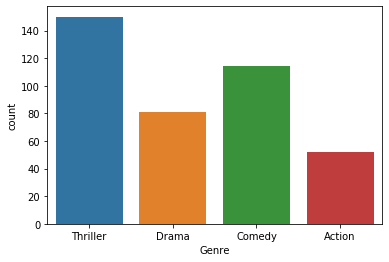

In [99]:
# Since "Genere" is categorical data hence we can replce missing values by most frequent datapoints
sns.countplot("Genre",data=data)

In [100]:
# Hence we can replace the missing values by thriller
data["Genre"]=data["Genre"].fillna("Thriller")


In [101]:
# TO find the outliers
data.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,48646.500000,55.017180,73.832700,0.469881,35197.771537,137.581750,7.810275,7.982812,7.813375,7.993887,7.894100,463223.567500,157.790000,258.083840,38.715000,523.650000
std,18308.499136,119.755634,13.023426,0.113920,4075.766926,28.990673,1.088694,1.089923,1.093581,1.088619,0.672413,65225.567649,31.403877,94.621476,12.651043,103.661283
min,10000.000000,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,215432.000000,0.000000,201.632000,3.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.550000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,158.760000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,182.890000,283.444000,50.000000,571.000000
max,100000.000000,1799.524000,106.300000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000


In [102]:
data.quantile([0.01,0.99])

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
0.01,16978.0,20.26218,57.4994,0.12900,25826.08380,80.099,4.6197,4.81470,4.6893,4.79975,6.76,267926.47,108.1052,202.23968,20.0,362.98
0.99,100000.0,472.15222,106.3000,0.60602,46524.40265,173.500,9.2703,9.48015,9.3204,9.50520,9.40,561132.87,212.9640,308.00000,60.0,838.02


In [103]:
# Removing Outliers (lower fence)

data["Collection"]=np.where(data["Collection"]<16978,data["Collection"].quantile(0.01),data["Collection"])
data["Budget"]=np.where(data["Budget"]<25826.08380,data["Budget"].quantile(0.01),data["Budget"])
data["Trailer_views"]=np.where(data["Trailer_views"]<267926.47,data["Trailer_views"].quantile(0.01),data["Trailer_views"])
data["Time_taken"]=np.where(data["Time_taken"]<108.1052,data["Time_taken"].quantile(0.01),data["Time_taken"])
data["Avg_age_actors"]=np.where(data["Avg_age_actors"]<20,data["Avg_age_actors"].quantile(0.01),data["Avg_age_actors"])


# Removing Outliers (upper fence)
data["Marketin_expense"]=np.where(data["Marketin_expense"]>472.152,data["Marketin_expense"].quantile(0.99),data["Marketin_expense"])
data["Twitter_hastags"]=np.where(data["Twitter_hastags"]>308,data["Twitter_hastags"].quantile(0.99),data["Twitter_hastags"])




In [104]:
data.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,48686.780000,50.770203,73.832700,0.469881,35234.804500,137.581750,7.810275,7.982812,7.813375,7.993887,7.894100,463527.369700,158.341052,253.797840,38.757500,523.650000
std,18233.027348,78.119839,13.023426,0.113920,3968.493813,28.990673,1.088694,1.089923,1.093581,1.088619,0.672413,64210.783208,29.536412,33.756776,12.558981,103.661283
min,16978.000000,20.126400,55.920000,0.129000,25826.083800,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,267926.470000,108.105200,201.632000,20.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.550000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,158.760000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,182.890000,283.444000,50.000000,571.000000
max,100000.000000,472.152220,106.300000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,308.000000,60.000000,868.000000


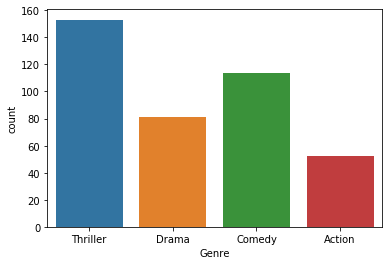

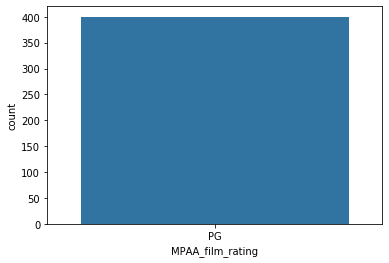

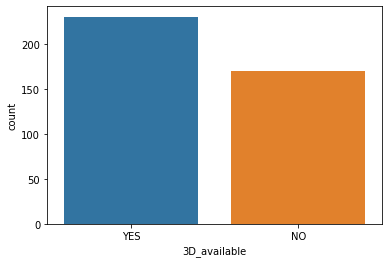

In [105]:
for i in data.columns:
    if data.dtypes[i]=="object":
        plt.subplots()
       # plt.figure()
        sns.countplot(x=i,data=data)
   

In [106]:
# As MPAA_rating has only one value hence remove it
df=data.drop("MPAA_film_rating",axis=1)

In [107]:
data=df

In [108]:
data

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,3D_available
0,48000.0,20.12640,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,Thriller,23.0,494,YES
1,43200.0,20.54620,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,Drama,42.0,462,NO
2,69400.0,20.54580,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051.0,147.88,308.000,Comedy,38.0,458,NO
3,66800.0,20.64740,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,Drama,45.0,472,YES
4,72400.0,21.38100,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,Drama,55.0,395,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,26200.0,194.33500,91.20,0.307,35946.405,172.3,8.980,9.260,9.085,9.225,7.96,424127.0,115.24,302.096,Action,29.0,712,NO
396,25000.0,137.44100,91.20,0.307,35579.775,169.5,9.115,9.180,9.100,9.255,6.96,390048.0,109.00,222.000,Thriller,24.0,685,YES
397,17000.0,173.44040,91.20,0.307,31924.585,172.4,9.135,9.230,9.125,9.240,6.96,384688.0,185.40,281.360,Comedy,22.0,663,NO
398,16978.0,472.15222,91.20,0.307,30291.415,173.5,9.215,9.370,9.105,9.330,6.96,291101.0,186.00,260.800,Drama,26.0,653,NO


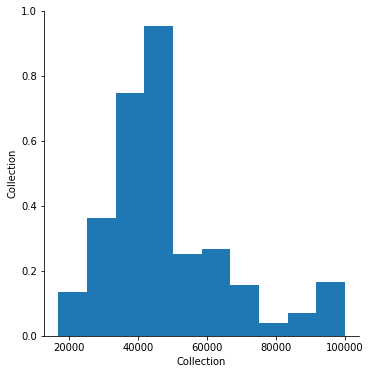

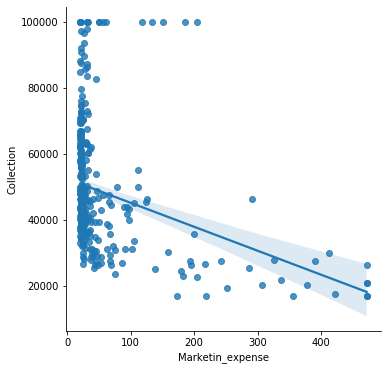

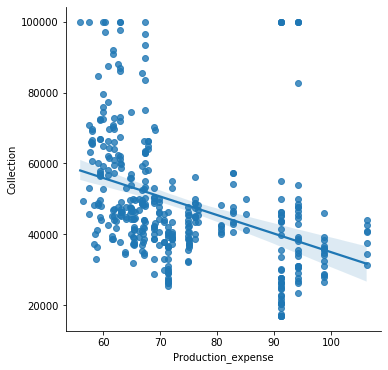

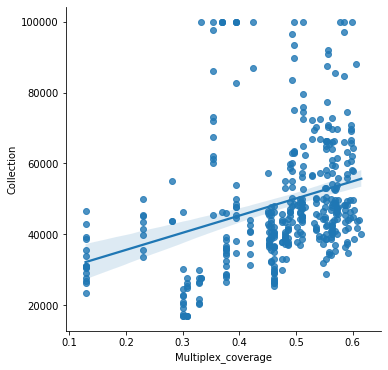

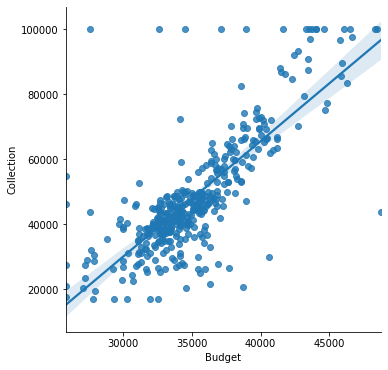

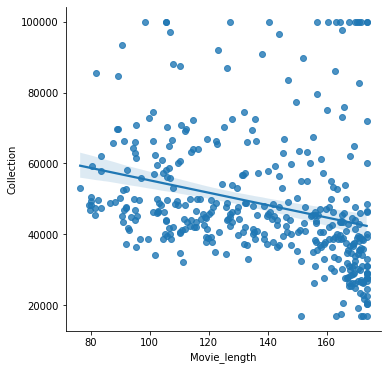

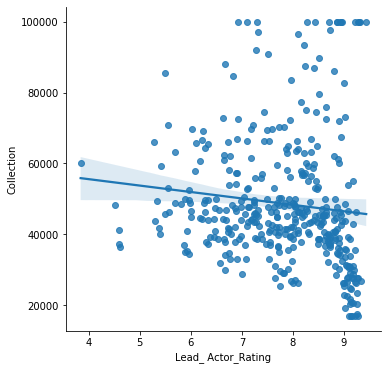

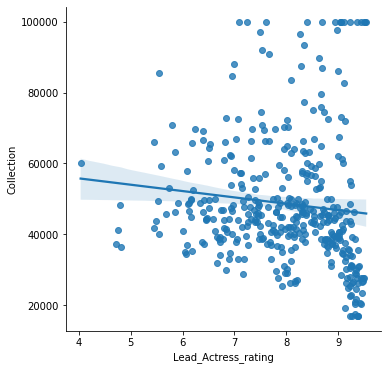

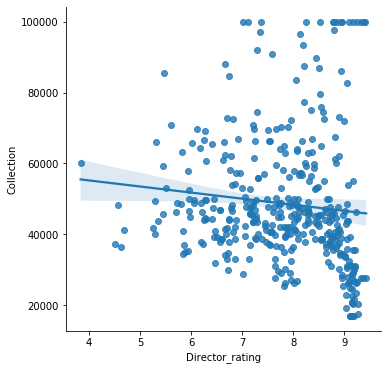

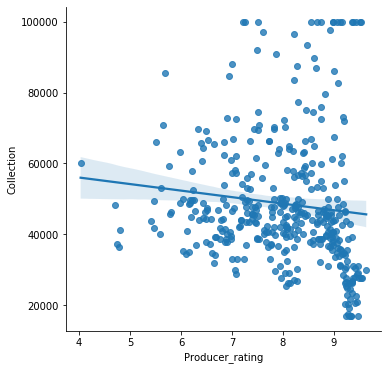

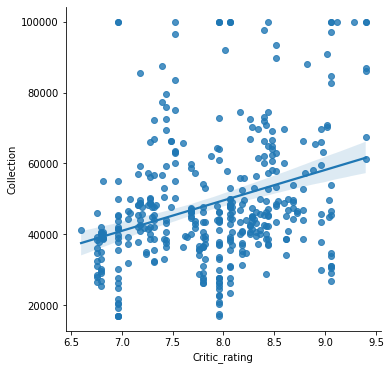

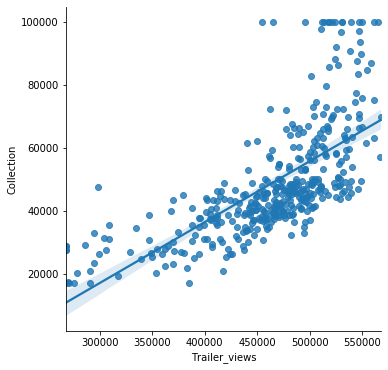

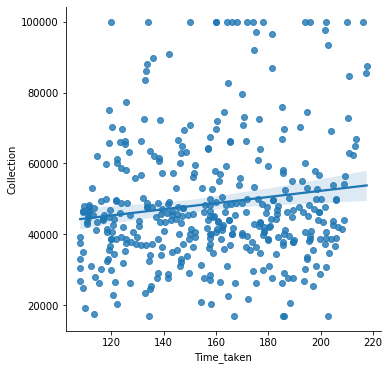

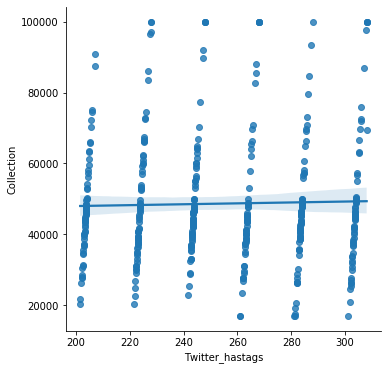

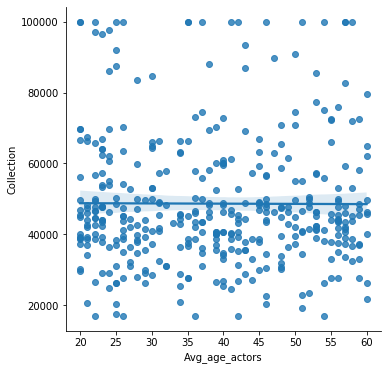

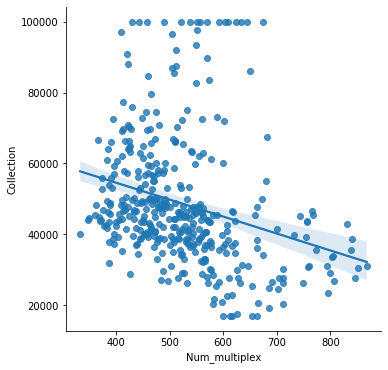

In [109]:
for i in data.columns:
    if data.dtypes[i]!="object":
        sns.pairplot(x_vars=i,y_vars="Collection",data=data,height=5,kind="reg")

In [110]:
#Variable Transformation & Reduction
# As Marketing expense scatterplor is more spread towards left side ,
# Hence it is necessary to spread equally on all sides
# log(1+e) treatment can be applied to make the data more dispersed
#data["Marketin_expense"]=np.log(1+data["Marketin_expense"])
#sns.jointplot("Marketin_expense","Collection",data=data)

In [111]:
data.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,48686.780000,50.770203,73.832700,0.469881,35234.804500,137.581750,7.810275,7.982812,7.813375,7.993887,7.894100,463527.369700,158.341052,253.797840,38.757500,523.650000
std,18233.027348,78.119839,13.023426,0.113920,3968.493813,28.990673,1.088694,1.089923,1.093581,1.088619,0.672413,64210.783208,29.536412,33.756776,12.558981,103.661283
min,16978.000000,20.126400,55.920000,0.129000,25826.083800,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,267926.470000,108.105200,201.632000,20.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.550000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,158.760000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,182.890000,283.444000,50.000000,571.000000
max,100000.000000,472.152220,106.300000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,308.000000,60.000000,868.000000


In [112]:
# Now convert qualitative data into quantitative data
data=pd.get_dummies(data)
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_NO,3D_available_YES
0,48000.0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,109.60,223.840,23.0,494,0,0,0,1,0,1
1,43200.0,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,146.64,243.456,42.0,462,0,0,1,0,1,0
2,69400.0,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,147.88,308.000,38.0,458,0,1,0,0,1,0
3,66800.0,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,185.36,225.344,45.0,472,0,0,1,0,0,1
4,72400.0,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,176.48,225.792,55.0,395,0,0,1,0,1,0


In [113]:
# Remove column "3D_available_NO"
data=data.drop("3D_available_NO",axis=1)


In [114]:
data

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,48000.0,20.12640,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,527367.0,109.60,223.840,23.0,494,0,0,0,1,1
1,43200.0,20.54620,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,494055.0,146.64,243.456,42.0,462,0,0,1,0,0
2,69400.0,20.54580,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,547051.0,147.88,308.000,38.0,458,0,1,0,0,0
3,66800.0,20.64740,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,516279.0,185.36,225.344,45.0,472,0,0,1,0,1
4,72400.0,21.38100,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,531448.0,176.48,225.792,55.0,395,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,26200.0,194.33500,91.20,0.307,35946.405,172.3,8.980,9.260,9.085,9.225,...,424127.0,115.24,302.096,29.0,712,1,0,0,0,0
396,25000.0,137.44100,91.20,0.307,35579.775,169.5,9.115,9.180,9.100,9.255,...,390048.0,109.00,222.000,24.0,685,0,0,0,1,1
397,17000.0,173.44040,91.20,0.307,31924.585,172.4,9.135,9.230,9.125,9.240,...,384688.0,185.40,281.360,22.0,663,0,1,0,0,0
398,16978.0,472.15222,91.20,0.307,30291.415,173.5,9.215,9.370,9.105,9.330,...,291101.0,186.00,260.800,26.0,653,0,0,1,0,0


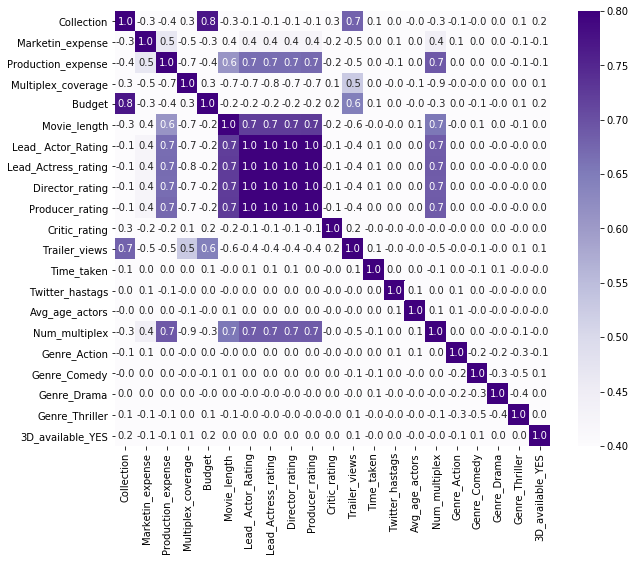

In [115]:
# Now COnsider Correlation matrix for multicollinearity
data_corr=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(data_corr,vmin=0.4,
            vmax=0.8,
            annot=True,
            square=True,
            fmt='.1f',
            cmap = 'Purples')

In [116]:
# Now remove the features Which have nearly Zero Collinearity
data=data.drop(['Genre_Action', 'Genre_Comedy','Genre_Drama','Avg_age_actors','Twitter_hastags'],axis=1)

In [117]:
data.columns

Index(['Collection', 'Marketin_expense', 'Production_expense',
       'Multiplex_coverage', 'Budget', 'Movie_length', 'Lead_ Actor_Rating',
       'Lead_Actress_rating', 'Director_rating', 'Producer_rating',
       'Critic_rating', 'Trailer_views', 'Time_taken', 'Num_multiplex',
       'Genre_Thriller', '3D_available_YES'],
      dtype='object')

In [118]:
# Now remove the feature which have Multiple collinearity
data=data.drop(['Lead_ Actor_Rating','Lead_Actress_rating', 'Director_rating', 'Producer_rating'],axis=1)

In [119]:
data.shape

(400, 12)

In [120]:
X=data.drop("Collection",axis=1)
Y=data["Collection"]

In [121]:
mod=sm.OLS(Y,X)
res=mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:             Collection   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              764.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                   1.19e-255
Time:                        18:28:27   Log-Likelihood:                         -4287.3
No. Observations:                 400   AIC:                                      8597.
Df Residuals:                     389   BIC:                                      8640.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [122]:
# remove Statistically insignificant features by considering P_values more that 0.025
new_var=["Production_expense","Multiplex_coverage","Budget","Movie_length","Trailer_views","Num_multiplex","3D_available_YES"]
new_data=data[new_var]
new_data.head()

,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Num_multiplex,3D_available_YES
0,59.62,0.462,36524.125,138.7,527367.0,494,1
1,69.14,0.531,35668.655,152.4,494055.0,462,0
2,69.14,0.531,39912.675,134.6,547051.0,458,0
3,59.36,0.542,38873.890,119.3,516279.0,472,1
4,59.36,0.542,39701.585,127.7,531448.0,395,0


In [123]:
## 70-30 Splitting ##
X_train,X_test,Y_train,Y_test=train_test_split(new_data,Y,test_size=0.3, random_state=42)

In [124]:
print(X_train.shape)

print(X_test.shape)
print(Y_train.shape)

(280, 7)
(120, 7)
(280,)


In [125]:
linreg=LinearRegression()
model=linreg.fit(X_train,Y_train)
print('R-squared value for training dataset is %.3f' %model.score(X_train,Y_train))
print('R-squared value for testing dataset is %.3f' %model.score(X_test,Y_test))
print('The estimated model intercept is %.3f' %model.intercept_)

R-squared value for training dataset is 0.657
R-squared value for testing dataset is 0.658
The estimated model intercept is -102374.337


In [126]:
# coefficient of all independet variable

list(zip(new_data.columns,model.coef_))

[('Production_expense', 53.92294232889179),
 ('Multiplex_coverage', 420.96127514820057),
 ('Budget', 2.4907896225791553),
 ('Movie_length', 1.9368299741647022),
 ('Trailer_views', 0.11236109385157031),
 ('Num_multiplex', 9.162101291699456),
 ('3D_available_YES', 3830.6941590382644)]

In [127]:
# coefficient of all independet variable

coeff_df = pd.DataFrame(new_data.columns,columns=['Independent variable'])
coeff_df['Coefficient'] = pd.Series(model.coef_)
coeff_df

,Independent variable,Coefficient
0,Production_expense,53.922942
1,Multiplex_coverage,420.961275
2,Budget,2.490790
3,Movie_length,1.936830
4,Trailer_views,0.112361
5,Num_multiplex,9.162101
6,3D_available_YES,3830.694159


In [128]:
# Prediction on training and testing datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_all = model.predict(new_data)

# Calculating Mean Squared Error (MSE)
#print('MSE of training dataset: %.2f' %np.mean((y_train - pred_train)**2))
#print('MSE of testing dataset: %.2f' %np.mean((y_test-pred_test)**2))
#print('MSE of overall dataset: %.2f' %np.mean((y-pred_all)**2))

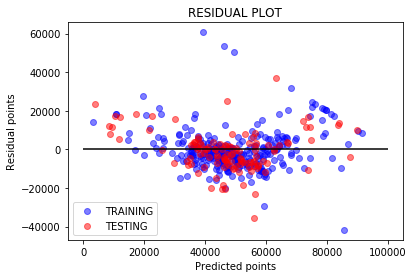

In [129]:
# PLoting scatter plot for residuals in train and test to see if there is any pattern
train = plt.scatter(pred_train,(Y_train-pred_train),color='blue',alpha=0.5,label='TRAINING')
test = plt.scatter(pred_test,(Y_test-pred_test),color='red',alpha=0.5,label="TESTING")
plt.hlines(y=0,xmin=-10,xmax=100000)
plt.title('RESIDUAL PLOT')
plt.xlabel('Predicted points')
plt.ylabel('Residual points')
plt.legend(loc=3)

In [130]:
# There is no pattern in residual so the model is correctly captured

In [131]:
# Creating Predected_target Ranking comparision of target and predicted variables
new_data['Predicted_Collection'] = pd.DataFrame(pred_all).round(decimals=2)
new_data["Target"]=data["Collection"]
new_data['Target_rank'] = pd.qcut(new_data['Target'].rank(method='first').values,5,duplicates='drop').codes+1
new_data['Predicted_rank'] = pd.qcut(new_data['Predicted_Collection'].rank(method='first').values,5,duplicates='drop').codes+1
new_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Num_multiplex,3D_available_YES,Predicted_Collection,Target,Target_rank,Predicted_rank
0,59.62,0.462,36524.125,138.7,527367.0,494,1,59889.89,48000.0,4,5
1,69.14,0.531,35668.655,152.4,494055.0,462,0,50461.17,43200.0,3,3
2,69.14,0.531,39912.675,134.6,547051.0,458,0,66915.69,69400.0,5,5
3,59.36,0.542,38873.890,119.3,516279.0,472,1,64277.31,66800.0,5,5
4,59.36,0.542,39701.585,127.7,531448.0,395,0,63523.43,72400.0,5,5


In [132]:
# Analysing the prediction by pivot table
pivot_table = pd.pivot_table(new_data,values='Target', index='Predicted_rank', columns='Target_rank',aggfunc='count')
pivot_table

Target_rank,1,2,3,4,5
Predicted_rank,,,,,
1,53.0,17.0,8.0,2.0,NaN
2,17.0,36.0,23.0,3.0,1.0
3,6.0,24.0,25.0,22.0,3.0
4,4.0,3.0,22.0,41.0,10.0
5,NaN,NaN,2.0,12.0,66.0


In [133]:
# Prediction percentage calculation by piviot table

dia = sum((53,36,25,41,66))
ab_dia = sum((17,17,23,24,22,22,10,12))+dia

print((dia/400)*100,'% data ranked similar in both actual and predicted') # 400 - Total number of observation (rows)
print((ab_dia/400)*100,'% of data is ranked in +/-1 of the Actual and Predicted') # 400 - Total number of observation (rows)

55.25 % data ranked similar in both actual and predicted
92.0 % of data is ranked in +/-1 of the Actual and Predicted


# 80-20 SPlitting

In [134]:
new_data_1=data[new_var]
new_data_1.head()

,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Num_multiplex,3D_available_YES
0,59.62,0.462,36524.125,138.7,527367.0,494,1
1,69.14,0.531,35668.655,152.4,494055.0,462,0
2,69.14,0.531,39912.675,134.6,547051.0,458,0
3,59.36,0.542,38873.890,119.3,516279.0,472,1
4,59.36,0.542,39701.585,127.7,531448.0,395,0


In [135]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(new_data_1,Y,test_size=0.2, random_state=1)
print('80% of indepenedent variable training data is',X1_train.shape)
print('20% of indepenedent variable training data is',X1_test.shape)
print('80% of depenedent variable testing data is',Y1_train.shape)
print('20% of depenedent variable testing data is',Y1_test.shape)

80% of indepenedent variable training data is (320, 7)
20% of indepenedent variable training data is (80, 7)
80% of depenedent variable testing data is (320,)
20% of depenedent variable testing data is (80,)


In [136]:
X1_train

,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Num_multiplex,3D_available_YES
93,85.08,0.536,34502.105,102.4,508101.0,492,0
23,71.28,0.462,32291.215,173.5,365213.0,527,1
299,59.48,0.600,39112.755,83.5,524749.0,414,1
13,71.28,0.462,33046.695,135.3,472490.0,535,1
90,61.82,0.511,35646.435,139.6,503147.0,424,1
...,...,...,...,...,...,...,...
255,62.28,0.608,32641.180,92.6,459998.0,438,0
72,76.62,0.587,33691.075,81.3,500290.0,361,0
396,91.20,0.307,35579.775,169.5,390048.0,685,1
235,67.40,0.493,33807.730,135.0,471552.0,525,1


In [137]:
linreg1=LinearRegression()
new_model=linreg1.fit(X1_train,Y1_train)

print('R-squared value for training dataset is %.3f' %new_model.score(X1_train,Y1_train))
print('R-squared value for testing dataset is %.3f' %new_model.score(X1_test,Y1_test))
print('The estimated model intercept is %.3f' %new_model.intercept_)
print("Coefficent are",new_model.coef_)

R-squared value for training dataset is 0.678
R-squared value for testing dataset is 0.584
The estimated model intercept is -91718.401
Coefficent are [-3.85468542e+01 -1.53193164e+03  2.46075265e+00  1.88390371e+01
  1.06590303e-01  7.67117189e+00  1.75430503e+03]


In [138]:
# coefficient of all independet variable

coeff_df = pd.DataFrame(new_data_1.columns,columns=['Independent variable'])
coeff_df['Coefficient'] = pd.Series(new_model.coef_)
coeff_df

,Independent variable,Coefficient
0,Production_expense,-38.546854
1,Multiplex_coverage,-1531.931640
2,Budget,2.460753
3,Movie_length,18.839037
4,Trailer_views,0.106590
5,Num_multiplex,7.671172
6,3D_available_YES,1754.305028


In [139]:
# Prediction on training and testing datasets
pred_train_1 = new_model.predict(X1_train)
pred_test_1 = new_model.predict(X1_test)
pred_all_1 = new_model.predict(new_data_1)

print('MSE of training dataset: %.2f' %np.mean((Y1_train - pred_train_1)**2))
print('MSE of testing dataset: %.2f' %np.mean((Y1_test - pred_test_1)**2))
print('MSE of overall dataset: %.2f' %np.mean((Y-pred_all_1)**2))

MSE of training dataset: 107036492.58
MSE of testing dataset: 135605131.62
MSE of overall dataset: 112750220.39


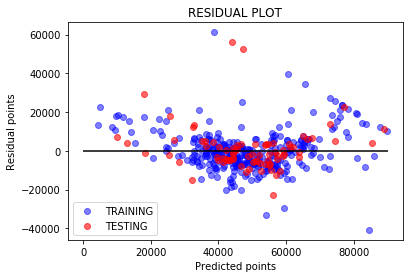

In [140]:
# PLoting scatter plot for residuals in train and test to see if there is any pattern
train_1 = plt.scatter(pred_train_1,(Y1_train-pred_train_1),c='blue',alpha=0.5,label='TRAINING')
test_1 = plt.scatter(pred_test_1,(Y1_test-pred_test_1),c='red',alpha=0.6,label='TESTING')
plt.hlines(y=0, xmin= -10, xmax= 90000)
plt.title('RESIDUAL PLOT')
plt.xlabel('Predicted points')
plt.ylabel('Residual points')
plt.legend(loc=3)

In [141]:
#Consider Target Variable
new_data_1["Target"]=data["Collection"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [145]:
new_data_1

,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Num_multiplex,3D_available_YES,Target,Predicted_Collection_1
0,59.62,0.462,36524.125,138.7,527367.0,494,1,48000.0,59521.57
1,69.14,0.531,35668.655,152.4,494055.0,462,0,43200.0,51651.37
2,69.14,0.531,39912.675,134.6,547051.0,458,0,69400.0,67377.70
3,59.36,0.542,38873.890,119.3,516279.0,472,1,66800.0,63475.11
4,59.36,0.542,39701.585,127.7,531448.0,395,0,72400.0,64941.99
...,...,...,...,...,...,...,...,...,...
395,91.20,0.307,35946.405,172.3,424127.0,712,0,26200.0,46666.70
396,91.20,0.307,35579.775,169.5,390048.0,685,1,25000.0,43626.46
397,91.20,0.307,31924.585,172.4,384688.0,663,0,17000.0,32192.18
398,91.20,0.307,30291.415,173.5,291101.0,653,0,16978.0,18141.89


In [146]:
new_data_1.head(20)

,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Num_multiplex,3D_available_YES,Target,Predicted_Collection_1
0,59.62,0.462,36524.125,138.7,527367.0,494,1,48000.0,59521.57
1,69.14,0.531,35668.655,152.4,494055.0,462,0,43200.0,51651.37
2,69.14,0.531,39912.675,134.6,547051.0,458,0,69400.0,67377.70
3,59.36,0.542,38873.890,119.3,516279.0,472,1,66800.0,63475.11
4,59.36,0.542,39701.585,127.7,531448.0,395,0,72400.0,64941.99
5,59.36,0.542,35718.650,132.2,498425.0,460,1,57400.0,53958.75
6,70.74,0.476,33396.660,140.1,459241.0,522,1,45800.0,44355.16
7,70.74,0.476,34285.460,169.6,400821.0,571,0,44200.0,39492.60
8,70.74,0.476,31280.205,173.5,295168.0,564,1,33000.0,22609.91
9,70.74,0.476,33352.220,159.4,412012.0,508,1,37800.0,39467.85


In [151]:

new_data_1['Target_rank_1'] = pd.qcut(new_data_1['Target'].rank(method='first').values,5,duplicates='drop').codes+1
new_data_1['Predicted_rank_1'] = pd.qcut(new_data_1['Predicted_Collection_1'].rank(method='first').values,5,duplicates='drop').codes+1
new_data_1.head()

,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Num_multiplex,3D_available_YES,Target,Predicted_Collection_1,Target_rank,Predicted_rank,Target_rank_1,Predicted_rank_1
0,59.62,0.462,36524.125,138.7,527367.0,494,1,48000.0,59521.57,4,4,4,4
1,69.14,0.531,35668.655,152.4,494055.0,462,0,43200.0,51651.37,3,4,3,4
2,69.14,0.531,39912.675,134.6,547051.0,458,0,69400.0,67377.70,5,5,5,5
3,59.36,0.542,38873.890,119.3,516279.0,472,1,66800.0,63475.11,5,5,5,5
4,59.36,0.542,39701.585,127.7,531448.0,395,0,72400.0,64941.99,5,5,5,5


In [152]:
# Analysing the prediction by pivot table
pivot_table_1 = pd.pivot_table(new_data_1,values='Target',index='Predicted_rank_1',columns='Target_rank_1',aggfunc='count')
pivot_table_1

Target_rank_1,1,2,3,4,5
Predicted_rank_1,,,,,
1,52.0,17.0,9.0,2.0,NaN
2,19.0,35.0,21.0,3.0,2.0
3,6.0,24.0,28.0,20.0,2.0
4,3.0,4.0,19.0,46.0,8.0
5,NaN,NaN,3.0,9.0,68.0


In [153]:
# Prediction percentage calculation by piviot table

dia_1 = sum((52,35,28,46,68))
ab_dia_1 = sum((17,19,21,24,20,19,8,9))+dia_1

print((dia_1/400)*100,'% of data ranked similar in both actual and predicted') # 400 - Total number of observation (rows)
print((ab_dia_1/400)*100,'% of data is ranked in +/-1 of the Actual and Predicted') # 400 - Total number of observation (rows)

57.25 % of data ranked similar in both actual and predicted
91.5 % of data is ranked in +/-1 of the Actual and Predicted


# Conclusion

In [156]:
# R-squared comparision
print('R-squared value for 70:30 testing split: %.2f' %model.score(X_test,Y_test))
print('R-squared value for 80:20 testing split: %.2f' %new_model.score(X1_test,Y1_test))

R-squared value for 70:30 testing split: 0.66
R-squared value for 80:20 testing split: 0.58


In [157]:
# Prediction percentage comparision
print('Prediction percentage for 70:30 split:')
print((dia/400)*100,'% data ranked similar in both actual and predicted')
print((ab_dia/400)*100,'% of data is ranked in +/-1 of the Actual and Predicted')
print()

print('Prediction percentage for 80:20 split:')
print((dia_1/400)*100,'% of data ranked similar in both actual and predicted')
print((ab_dia_1/400)*100,'% of data is ranked in +/-1 of the Actual and Predicted')

Prediction percentage for 70:30 split:
55.25 % data ranked similar in both actual and predicted
92.0 % of data is ranked in +/-1 of the Actual and Predicted

Prediction percentage for 80:20 split:
57.25 % of data ranked similar in both actual and predicted
91.5 % of data is ranked in +/-1 of the Actual and Predicted


In [ ]:
# Higher the R-squared value greater the variance is explained by the model
        # 70:30 split has the higher R-squared value
    
# Higher the prediction percentage more accurate the results would be
        # 70:30 split has the higher prediction percentage
    
# The 70:30 split got lot of data to train itself so the model is more accurate in comparision and it is best suited split

In [163]:
lm_df=new_data_1
lm_df

,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Num_multiplex,3D_available_YES,Target,Predicted_Collection_1,Target_rank,Predicted_rank,Target_rank_1,Predicted_rank_1
0,59.62,0.462,36524.125,138.7,527367.0,494,1,48000.0,59521.57,4,4,4,4
1,69.14,0.531,35668.655,152.4,494055.0,462,0,43200.0,51651.37,3,4,3,4
2,69.14,0.531,39912.675,134.6,547051.0,458,0,69400.0,67377.70,5,5,5,5
3,59.36,0.542,38873.890,119.3,516279.0,472,1,66800.0,63475.11,5,5,5,5
4,59.36,0.542,39701.585,127.7,531448.0,395,0,72400.0,64941.99,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,91.20,0.307,35946.405,172.3,424127.0,712,0,26200.0,46666.70,1,3,1,3
396,91.20,0.307,35579.775,169.5,390048.0,685,1,25000.0,43626.46,1,2,1,2
397,91.20,0.307,31924.585,172.4,384688.0,663,0,17000.0,32192.18,1,1,1,1
398,91.20,0.307,30291.415,173.5,291101.0,653,0,16978.0,18141.89,1,1,1,1


In [178]:
l1=lm_df.drop(["Predicted_Collection_1","Target_rank","Predicted_rank","Target_rank_1","Predicted_rank_1"],axis=1)

In [179]:
l1

,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Num_multiplex,3D_available_YES,Target
0,59.62,0.462,36524.125,138.7,527367.0,494,1,48000.0
1,69.14,0.531,35668.655,152.4,494055.0,462,0,43200.0
2,69.14,0.531,39912.675,134.6,547051.0,458,0,69400.0
3,59.36,0.542,38873.890,119.3,516279.0,472,1,66800.0
4,59.36,0.542,39701.585,127.7,531448.0,395,0,72400.0
...,...,...,...,...,...,...,...,...
395,91.20,0.307,35946.405,172.3,424127.0,712,0,26200.0
396,91.20,0.307,35579.775,169.5,390048.0,685,1,25000.0
397,91.20,0.307,31924.585,172.4,384688.0,663,0,17000.0
398,91.20,0.307,30291.415,173.5,291101.0,653,0,16978.0


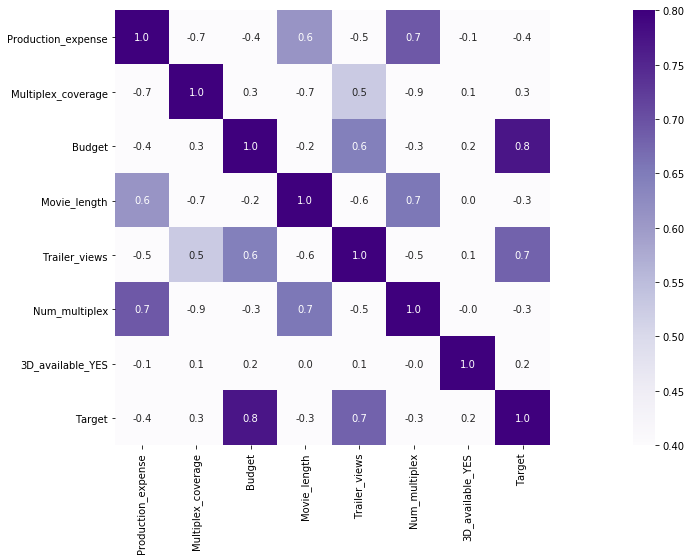

In [180]:
data_corr_1=l1.corr()
plt.subplots(figsize=(30,8))
sns.heatmap(data_corr_1,vmin=0.4,
            vmax=0.8,
            annot=True,
            square=True,
            fmt='.1f',
            cmap = 'Purples')